<a href="https://colab.research.google.com/github/gpasky/MAT-421/blob/main/ModG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gabriel Pascual

**21.4 Simpson's Rule**

Approximates the area under $f(x)$ over the two subintervals $[x_{i-1},x_i]$ and $[x_i,x_{i+1}]$ by fitting and integrating a quadratic polynomial through $(x_{i-1},f(x_{i-1}))$, $(x_i,f(x_i))$, and $(x_{i+1},f(x_{i+1}))$.

*   It is required to have an even number of intervals and an odd number of grid points

Taylor series approximation:

*   $f(x)=f(x_i)+f'(x_i)(x-x_i)+\frac{f''(x_i)(x-x_i)^2}{2!}+\frac{f'''(x_i)(x-x_i)^3}{3!}+\frac{f''''(x_i)(x-x_i)^4}{4!}+...$

We compute the Taylor series at $x_{i-1}$ and $x_{i+1}$ and substituting for the step size (h).

Resulting equation after dropping the odd powered terms and summing the integrals:

*   $ \int_{x_i-1}^{x_i+1} f(x) \,dx = \frac{h^3}{3}(f(x_{i-1})+4f(x_i)+f(x_{i+1}))+O(h^5)$

Ex: We can use Simpson's Rule to approximate $\int_{0}^{1} e^xdx$ with 11 evenly spaced grid points.

In [2]:
import numpy as np

a = 0
b = 1
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.exp(x)

I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) \
                  + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = 2 - I_simp

print(I_simp)
print(err_simp)

1.7849494485914903
0.2150505514085097


**21.5 Computing Integrals in Python**

scipy.integrate: contains several functions to compute integrals

trapz: takes in an array of function values $f$ computed on a numerical grid $x$

Ex: trapz can be used to approximate $\int_{0}^{1} e^xdx$ for 11 equally spaced points. The result will be compared to the result from the Trapezoid Rule.

In [9]:
import numpy as np
from scipy.integrate import trapezoid

a = 0
b = 1
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.exp(x)

I_trapz = trapezoid(f,x)
I_trap = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])

print(I_trapz)
print(I_trap)

1.7197134913893146
1.7197134913893146


cumtrapz and cumsum: We can find the approximated cumulative integral $F(X)=\int_{x_0}^{X}f(x)dx$

Ex: The cumtrapz function will approximate the integral $f(x)=e^x$ from $0$ to $1$ using step = 0.01

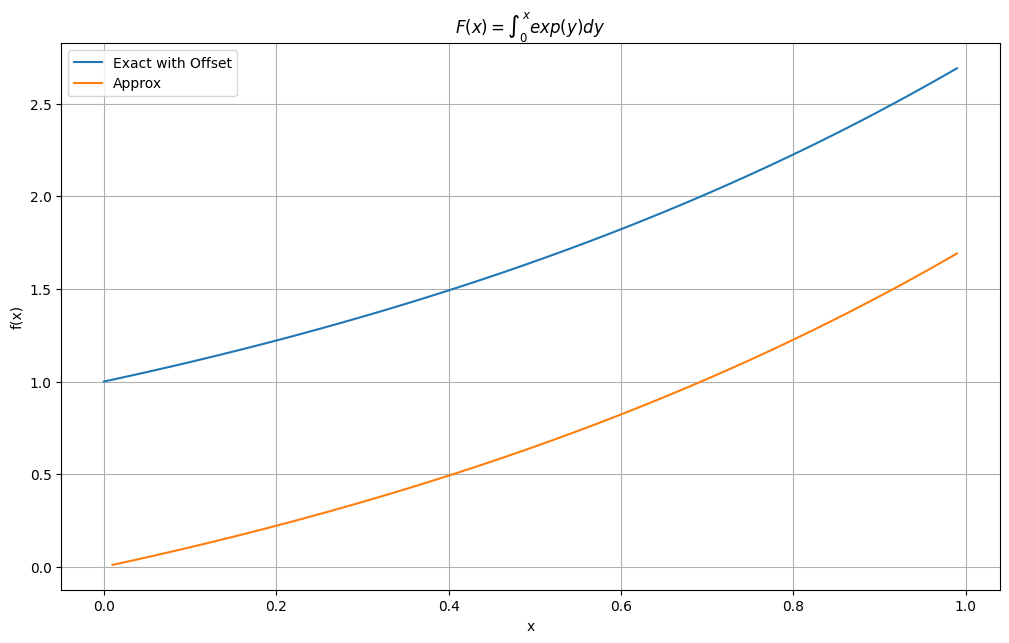

In [13]:
from scipy.integrate import cumulative_trapezoid
import matplotlib.pyplot as plt

x = np.arange(0, 1, 0.01)
F_exact = np.exp(x)
F_approx = cumulative_trapezoid(np.exp(x),x)

plt.figure(figsize = (10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$F(x) = \int_0^{x} exp(y) dy$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset', 'Approx'])
plt.show()

quad(f,a,b): quad integrates the function defined by f on [a,b].

Ex: The integrate.quad function will be used to compute the integral of $f(x)=cos(x)$ from $0$ to $π$. This will be compared to the correct answer of 0.

In [16]:
from scipy.integrate import quad
import numpy as np

I_quad, est_err_quad = quad(np.cos, 0, np.pi)
print(I_quad)
err_quad = 0 - I_quad
print(est_err_quad, err_quad)

4.9225526349740854e-17
2.2102239425853306e-14 -4.9225526349740854e-17
